In [362]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [363]:
X1 = np.array([1, -2, -1, -1, 1])
y1 = 7
X2 = np.array([2, -1, 2, 0, -2])
y2 = 1
X3 = np.array([-1, 0, 2, 2, 1])
y3 = 1

In [364]:
X = np.array([X1, X2, X3])
y = np.array([y1, y2, y3])
W0 = np.array([0,0,0,0,0]).astype('float64')

In [365]:
def L(preds, y):
    return sum([(pred - y_i)**2 for pred, y_i  in zip(preds, y)])

In [366]:
#Not used
def prox_L(W, z, lambda_value, trim = False):
    #Find z
    R = regularization_term(z, lambda_value, trim = trimmed)
    
    l2_norm = np.linalg.norm(z - W, ord = 2)
    
    return lambda_value * R + 0.5 * l2_norm**2

In [367]:
def regularization_term(W, lambda_value, trim = False, proj_dim = 3):
    
    W_copy = W.copy()
        
    #if trim:
    #    W_thres = abs_threshold(W, proj_dim)
    #    bin_mask = np.where(np.absolute(W) > W_thres, 0, 1)
    #    W_copy = np.multiply(W, bin_mask)
    
    return lambda_value * np.linalg.norm(W_copy, ord=1)

In [368]:
#You should leave it as the sum.- TA
def sum_grads(grads):
    return np.array([grads[:,i].sum() for i in range(len(grads[0]))])

In [369]:
def abs_threshold(W, proj_dim):
    return sorted(np.absolute(W))[-proj_dim]

In [370]:
def soft_threshold(W, lambda_value, trim = False, proj_dim = 3):
    W_out = []
    
    W_copy = W.copy()
    
    if trim:
        W_thres = abs_threshold(W_copy, proj_dim)
        special_indices = (np.absolute(W_copy) > W_thres)
    
    for i, w_i in enumerate(W_copy):
        if trim and special_indices[i]:
            W_out.append(W_copy[i])            
        elif w_i > lambda_value:
            W_out.append(w_i - lambda_value)
        elif w_i < -lambda_value:
            W_out.append(w_i + lambda_value)
        else:
            W_out.append(0)
    
    return W_out

In [371]:
def squared_error_grads(X, y, model_preds):
    return np.array([2 * X[i].T * (y[i] - model_preds[i]) for i in range(len(X))])

In [372]:
def regularized_update(W, lambda_value, proj_dim = 3, trim = False):
    
    W_regularized = W.copy()
    
    #if trim:
    #    W_thres = abs_threshold(W, proj_dim)
    #    W_regularized[np.absolute(W) > W_thres] = 0
        
    return np.sign(W_regularized) * lambda_value

In [373]:
W = np.array([1,2,3,4,5])
grads = np.array([1,2,34,5,6])
lambda_value = 5
soft_thres = 0.1

In [374]:
def plot_log_losses_and_sparsity(weights, losses, technique_title, n_steps = 200):
    fig, axs = plt.subplots(1, 2, figsize=(30, 10))
    
    plt.subplot(1,2,1)
    epochs_x = list(range(n_steps))
    log_losses = np.log(np.array(losses))
    plt.scatter(epochs_x, log_losses)
    plt.title(f'Log Squared Error Loss over 200 epochs of {technique_title}')
    
    plt.subplot(1,2,2)
    epochs_x = list(range(n_steps+1))
    np_weights = np.array(weights)
    for i in range(len(weights[0])):
        plt.scatter(epochs_x, np_weights[:,i], label = f'w_{i}')
    plt.legend()
    plt.title(f'Weights over 200 epochs of gradient descent with {technique_title}')

In [375]:
def plot_losses(losses, n_steps = 200):
    plt.figure(figsize=(10,10))
    epochs_x = list(range(n_steps))
    plt.scatter(epochs_x, losses)

In [376]:
def plot_sparsity(weights, n_steps = 200):
    plt.figure(figsize=(10,10))
    epochs_x = list(range(n_steps+1))
    np_weights = np.array(weights)
    for i in range(len(weights[0])):
        plt.scatter(epochs_x, np_weights[:,i])

In [377]:
mu = 0.02
n_steps = 200
W_current = W0.copy()

In [378]:
def optimize(W_current, X, y, n_steps, proj_dim = None, lambda_value = None, soft_thres = None, trimmed = False):
    losses = []
    weights = [W_current]
    W_iter = W_current.copy()
    for epoch in range(n_steps):
        model_preds = [X_i @ W_iter for X_i in X]
        
        current_loss = L(model_preds, y)
        
        grads = squared_error_grads(X, y, model_preds)
        summed_grads = sum_grads(grads)
        
        #Affects loss function
        if lambda_value is not None and not trimmed:
            
            #TA said to plot log(L) without regularization term added
            #current_loss += regularization_term(W_iter, lambda_value, trim = trimmed)
            
            #Gradient of L1 norm term is going to be sign(w_i)
            #multiply by lambda

            summed_grads = summed_grads - regularized_update(W_iter, lambda_value, trim = trimmed)
        
        W_iter += mu * summed_grads
        losses.append(current_loss) 
        
        if soft_thres is not None:
            W_iter = soft_threshold(W_iter, soft_thres, trim = trimmed)
        
        #Prune
        if proj_dim is not None:
            W_thres = abs_threshold(W_iter, proj_dim)
            bin_mask = np.where(np.absolute(W_iter) >= W_thres, 1, 0)
            W_iter = np.multiply(W_iter, bin_mask)
        
        weights.append(W_iter.copy())
        
    return W_iter, losses, weights

In [379]:
W_generic, losses_generic, weights_generic = optimize(W_current, X, y, n_steps)

In [380]:
W_generic

array([ 0.74759615, -2.38942308,  0.12259615, -0.03125   ,  1.56490385])

c

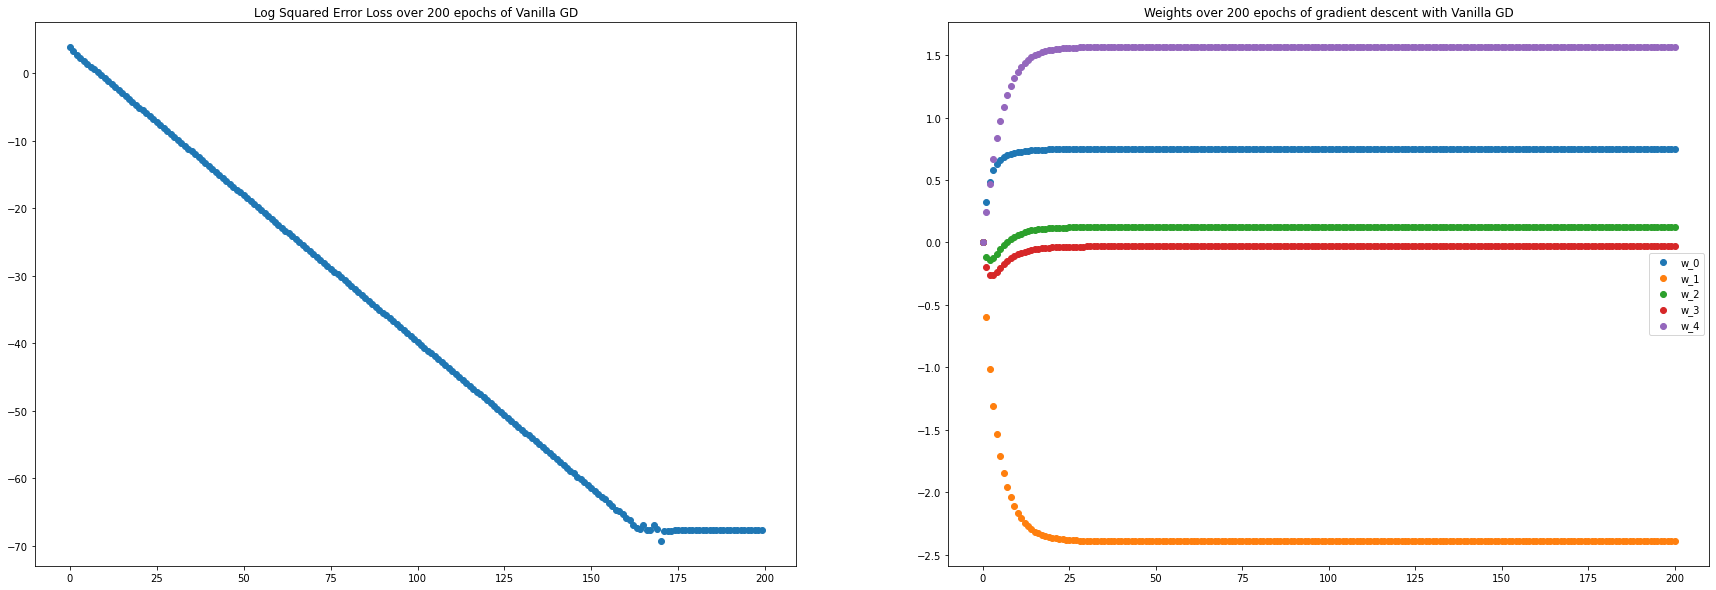

In [381]:
plot_log_losses_and_sparsity(weights_generic, losses_generic, technique_title = 'Vanilla GD')
#plot_sparsity()

In [382]:
W_current = W0.copy()

In [383]:
W_proj, losses_proj, weights_proj = optimize(W_current, X, y, n_steps, proj_dim = 2)

In [384]:
W_proj

array([ 0., -3., -0., -0.,  1.])

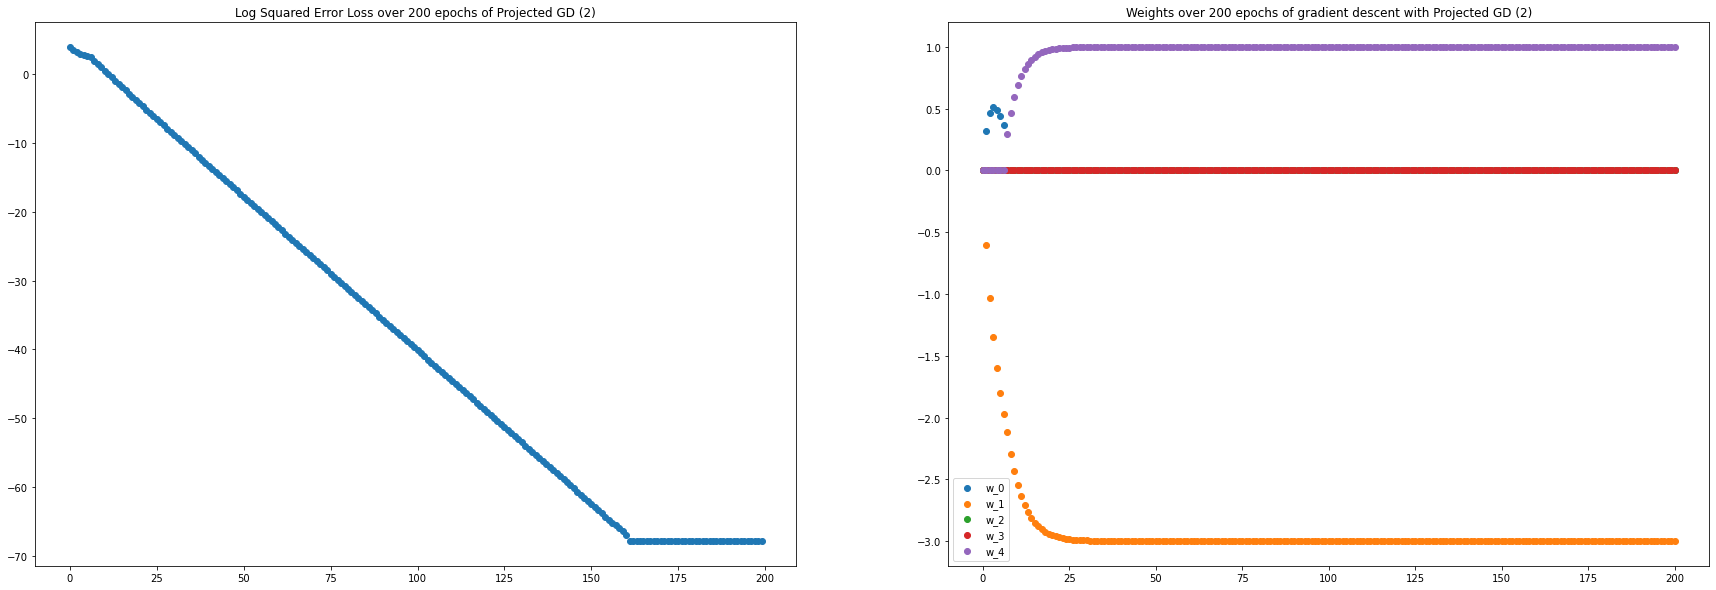

In [385]:
plot_log_losses_and_sparsity(weights_proj, losses_proj, technique_title = 'Projected GD (2)')

d

In [386]:
W_current = W0.copy()
lambdas = np.array([0.2, 0.5, 1.0, 2.0])

[ 3.73490632e-01 -2.67447522e+00  3.12622639e-02  3.51021267e-04
  1.25352897e+00]
[ 9.86962942e-03 -2.94696785e+00 -7.87580251e-04  8.60508674e-04
  9.57922261e-01]
[-0.00767726 -2.89320225  0.00957581  0.00316848  0.91767585]
[-0.00552779 -2.77999112 -0.04210149 -0.00459144  0.84427393]


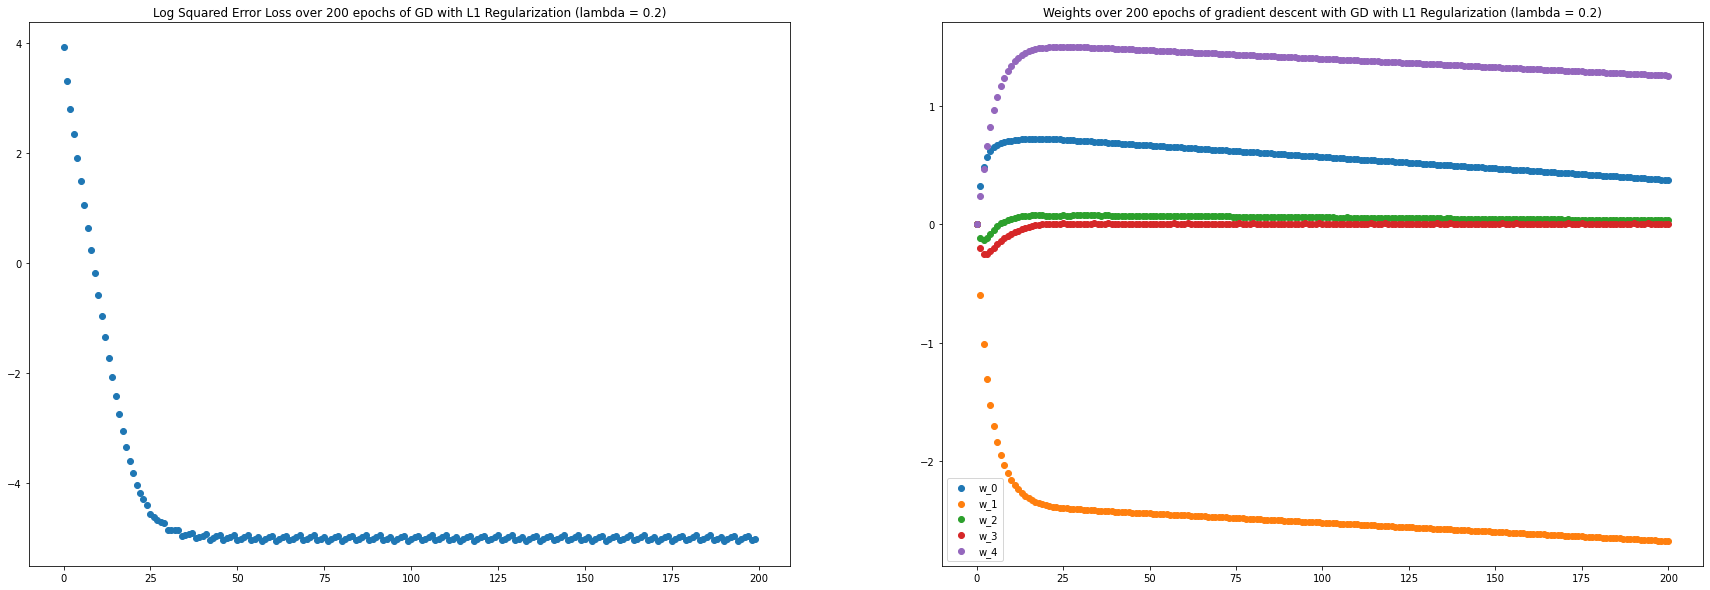

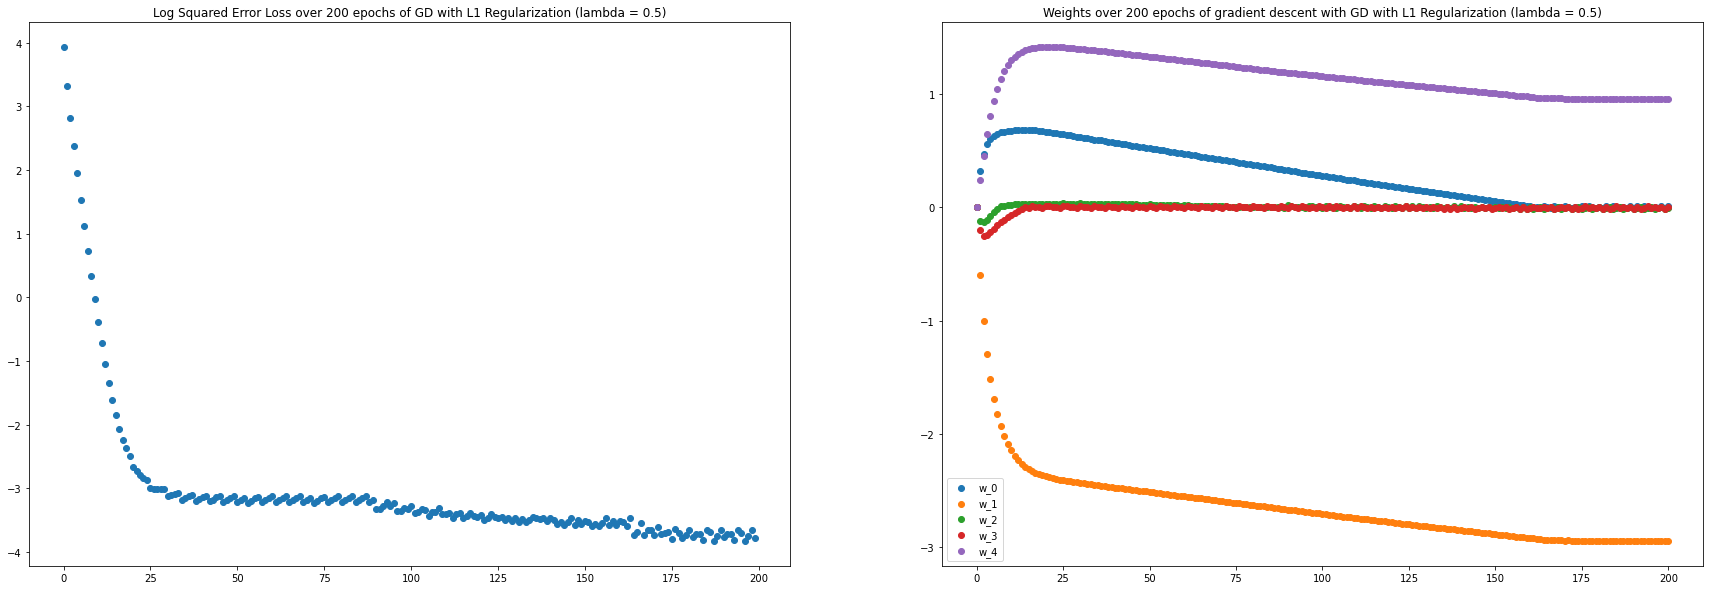

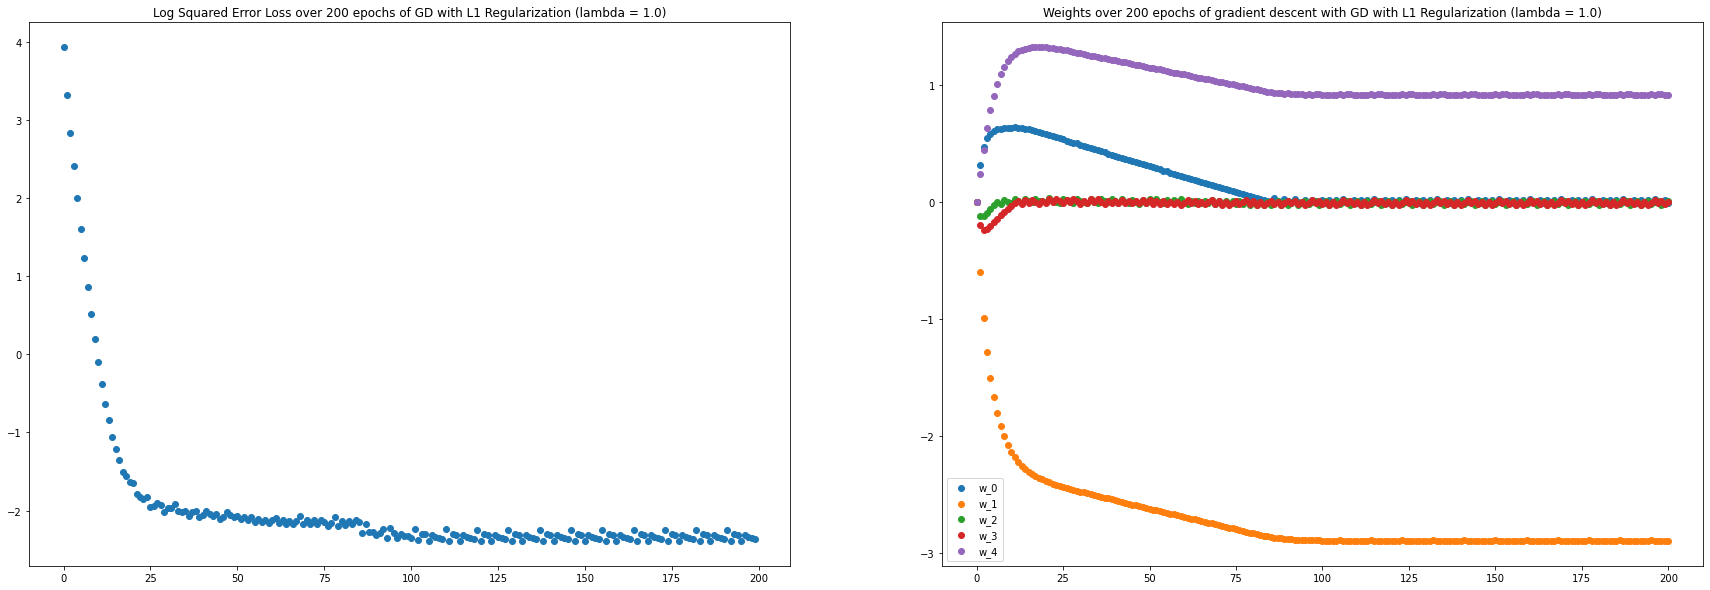

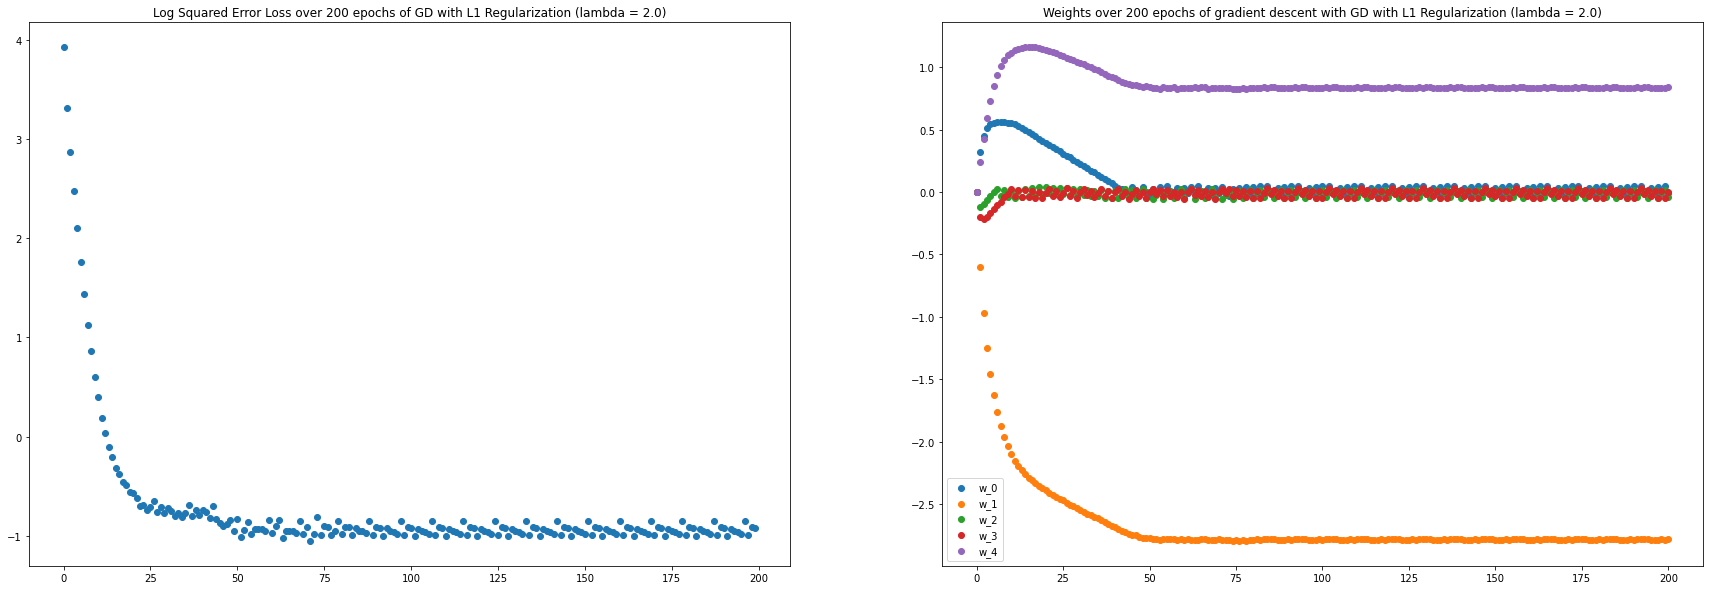

In [387]:
for lambda_value in lambdas:
    W_current = W0.copy()
    W_reg, losses_reg, weights_reg = optimize(W_current, X, y, n_steps, lambda_value = lambda_value)
    print(W_reg)
    plot_log_losses_and_sparsity(weights_reg, losses_reg, technique_title = f'GD with L1 Regularization (lambda = {lambda_value})')

e

In [388]:
thres_values = [0.004, 0.01, 0.02, 0.04]

[0.3706994373357713, -2.6756671707791564, 0.03266545804153058, 0, 1.2527369423053414]
[0, -2.9499970679612586, 0, 0, 0.9583336118961215]
[0, -2.899999999999816, 0, 0, 0.916666666666667]
[0, -2.799999999999999, 0, 0, 0.8333333333333334]


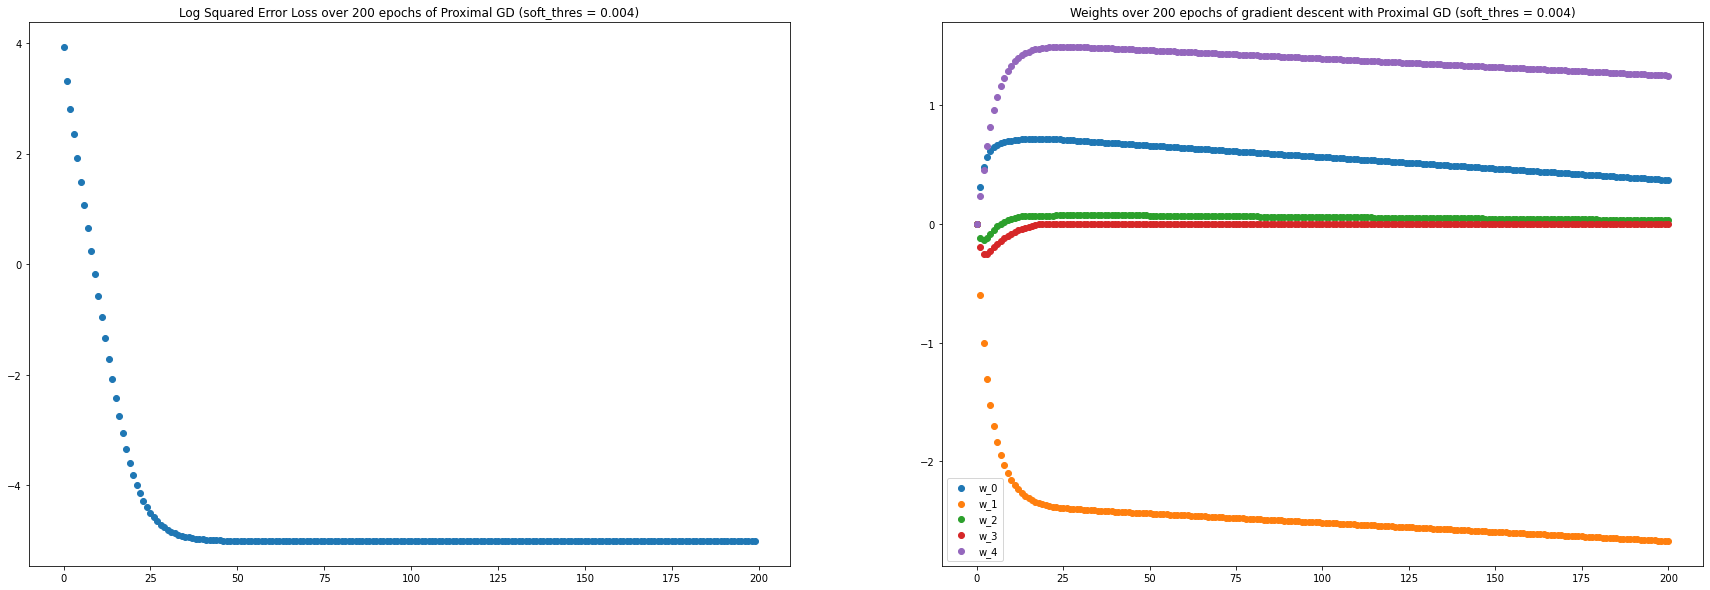

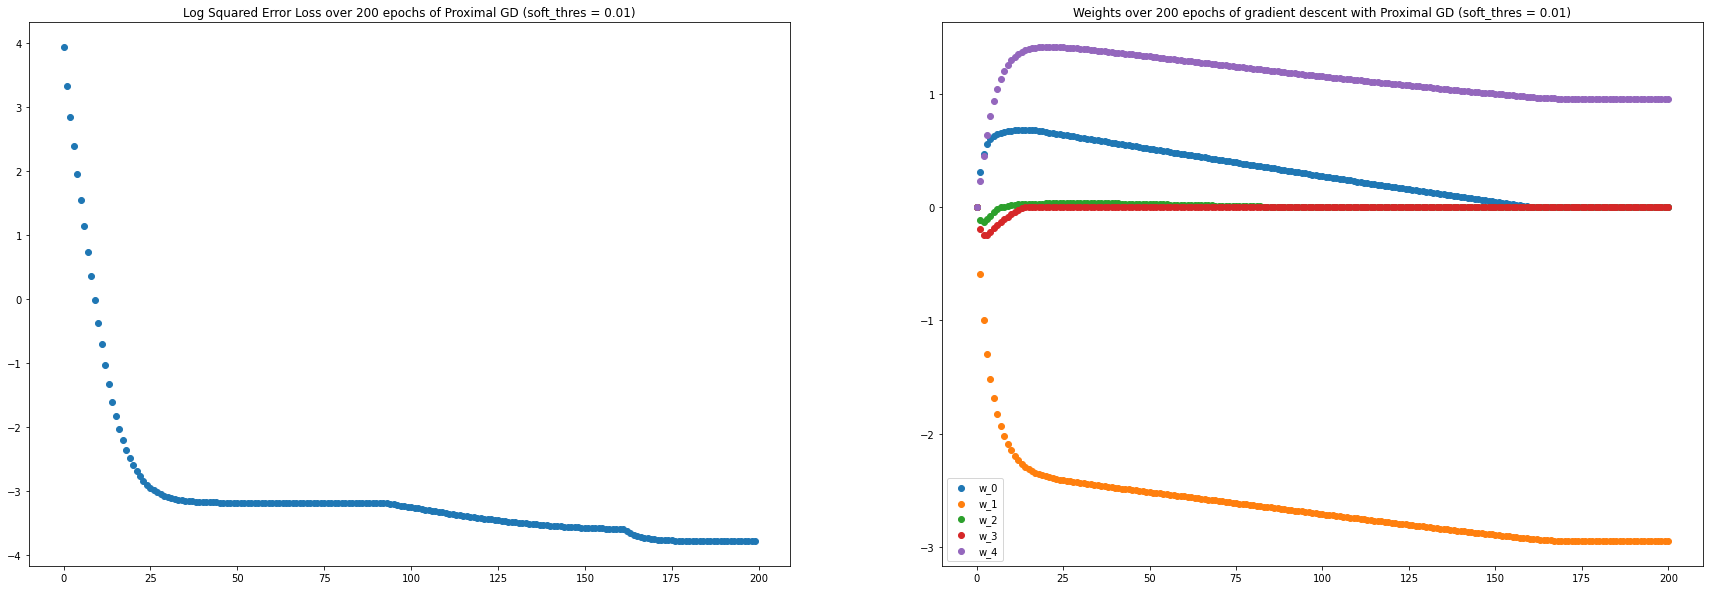

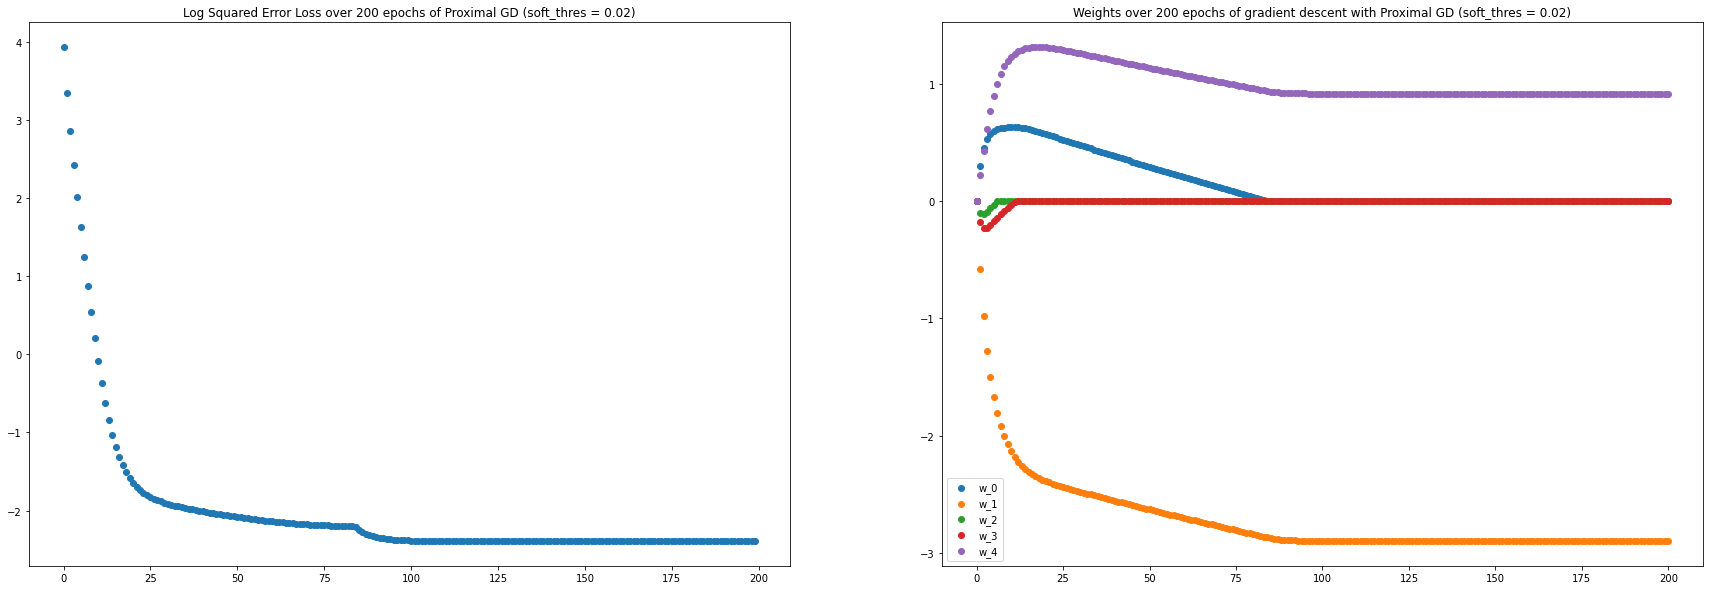

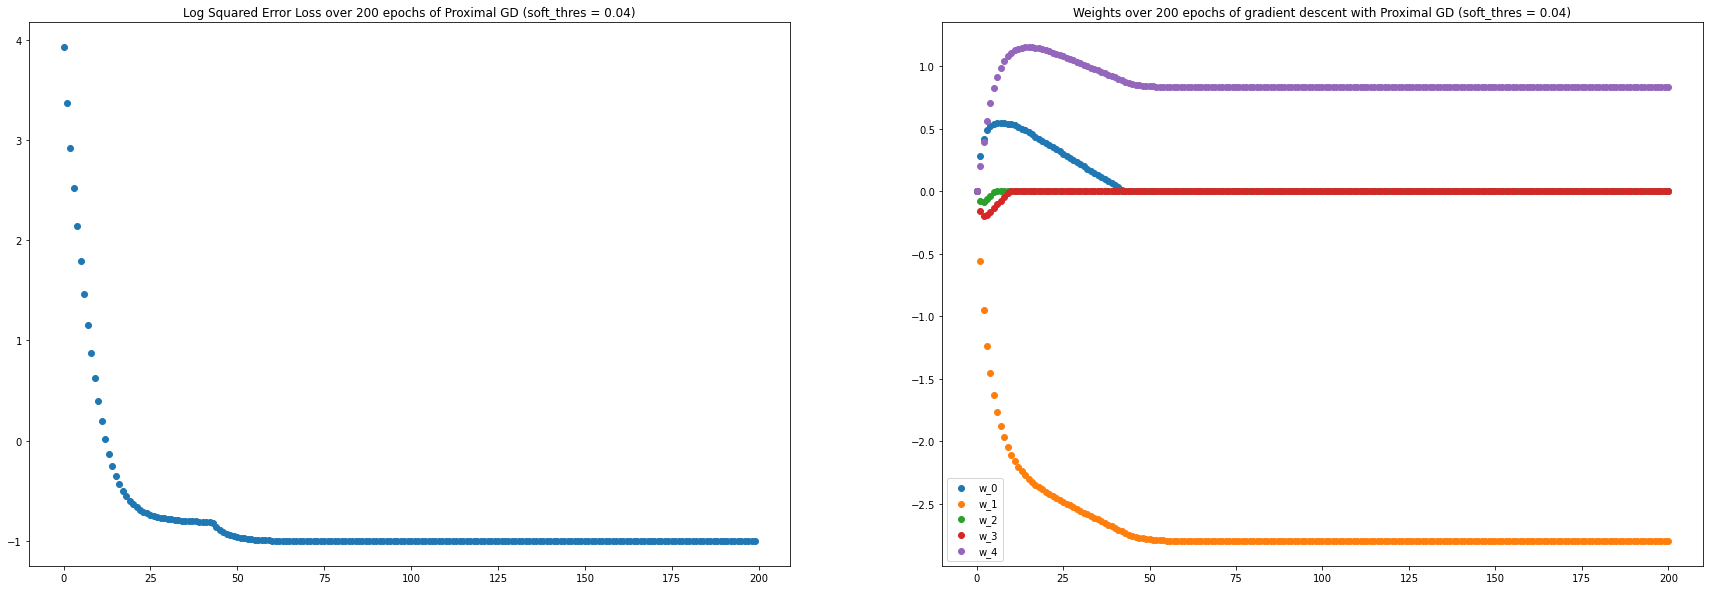

In [389]:
for thres in thres_values:
    W_current = W0.copy()
    W_prox, losses_prox, weights_prox = optimize(W_current, X, y, n_steps, soft_thres = thres)
    print(W_prox)
    plot_log_losses_and_sparsity(weights_prox, losses_prox, technique_title = f'Proximal GD (soft_thres = {thres})')

f

In [390]:
lambda_values = [1, 2, 5, 10]
thres_values = [0.02, 0.04, 0.1, 0.2]

[0, -2.9999999999999676, 0, 0, 1.0000000000000002]
[0, -2.999999999999999, 0, 0, 1.0000000000000002]
[0, -2.999999999999999, 0, 0, 1.0000000000000002]
[0, -2.999999999999999, 0, 0, 0.9999999999999998]


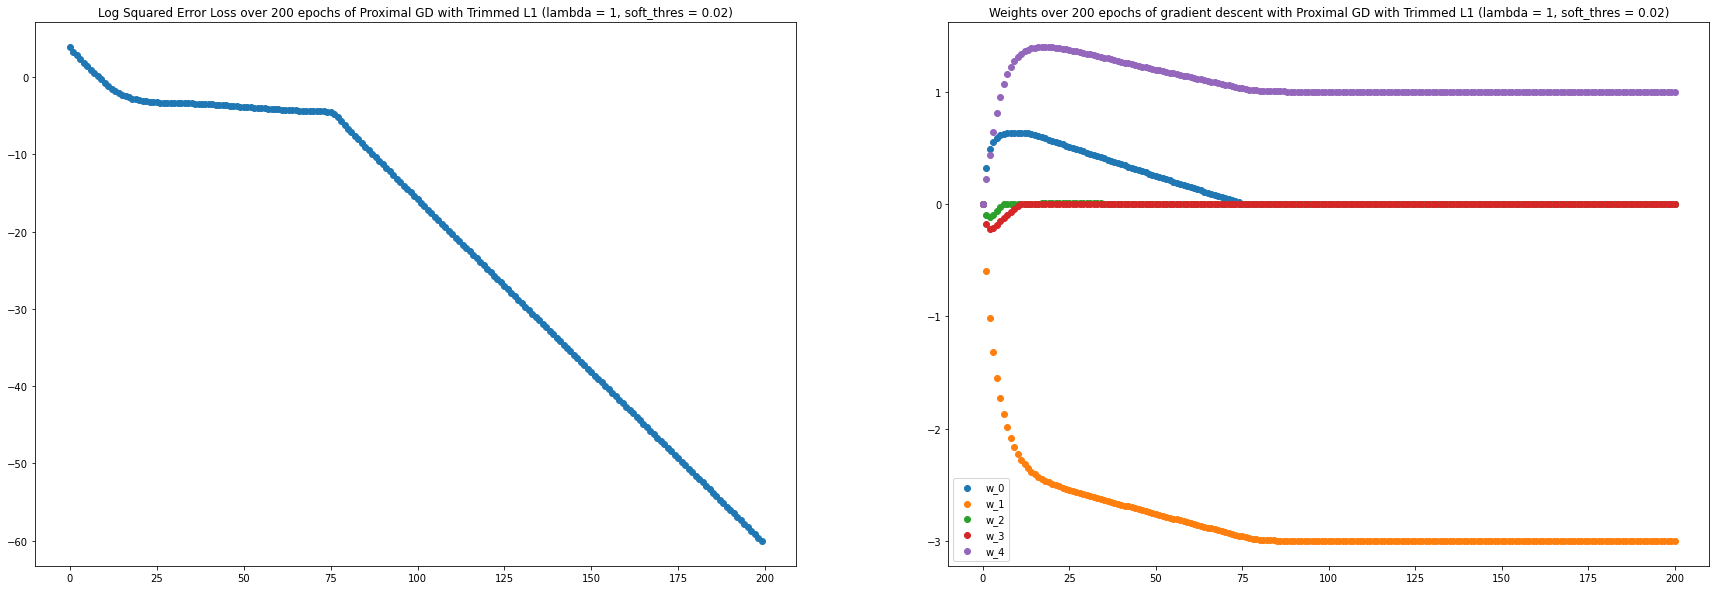

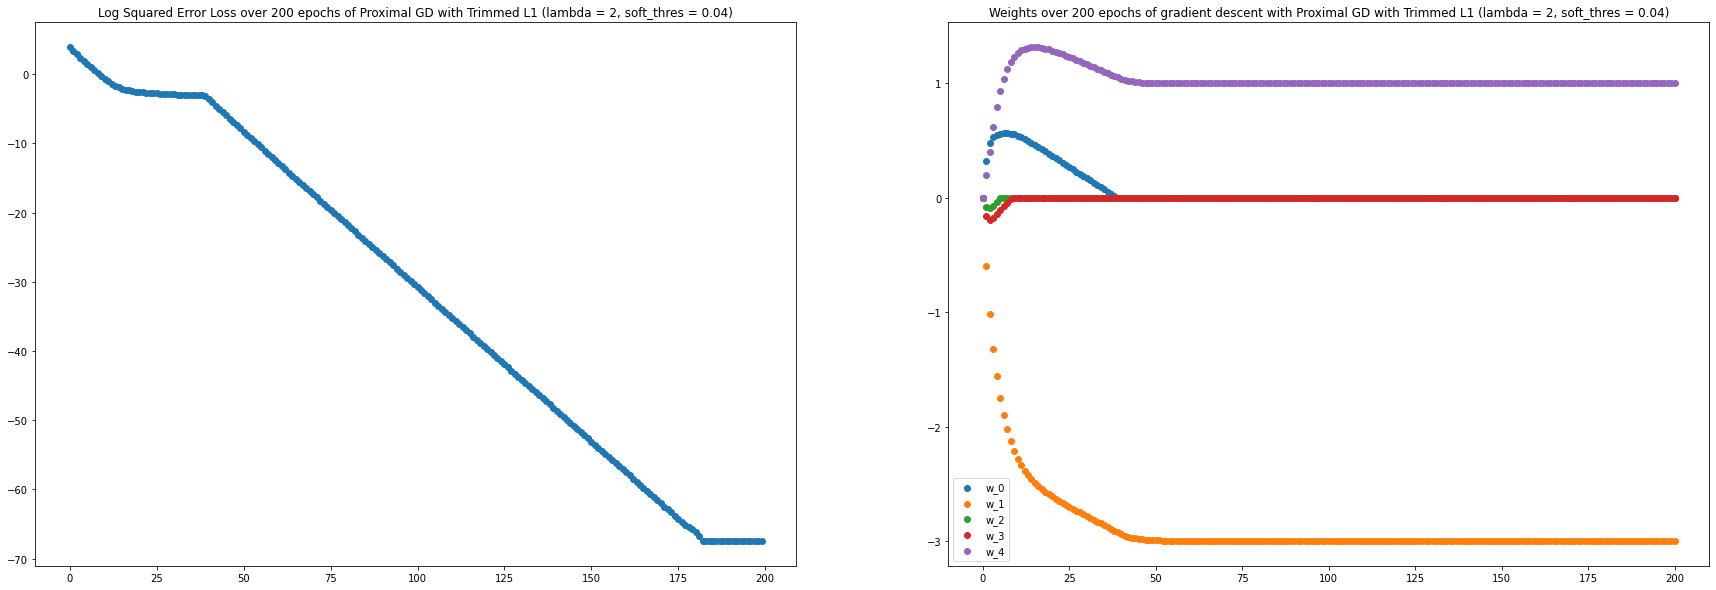

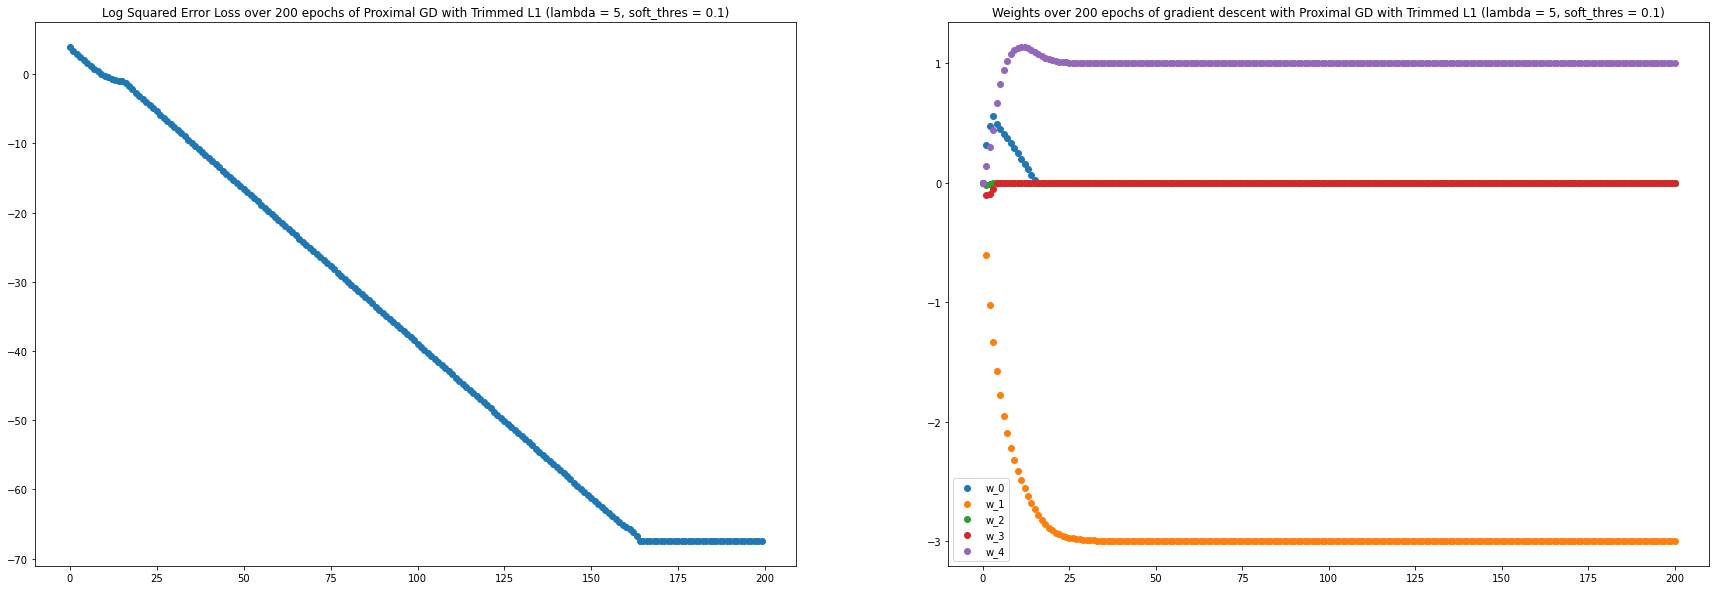

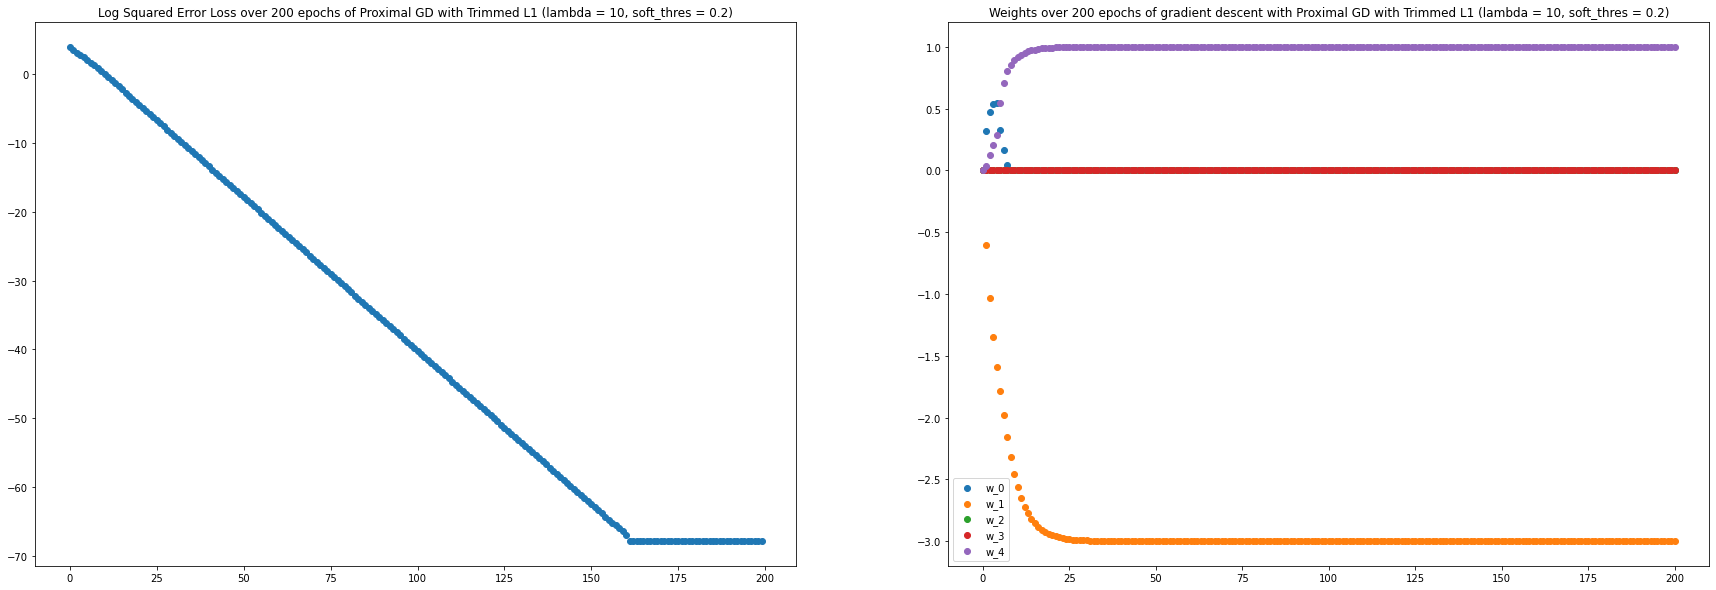

In [391]:
for lambda_value, thres in zip(lambda_values, thres_values):
    W_current = W0.copy()
    W_trim, losses_trim, weights_trim = optimize(W_current, X, y, n_steps, lambda_value = lambda_value, soft_thres = thres, trimmed = True)
    print(W_trim)
    plot_log_losses_and_sparsity(weights_trim, losses_trim, technique_title = f'Proximal GD with Trimmed L1 (lambda = {lambda_value}, soft_thres = {thres})')